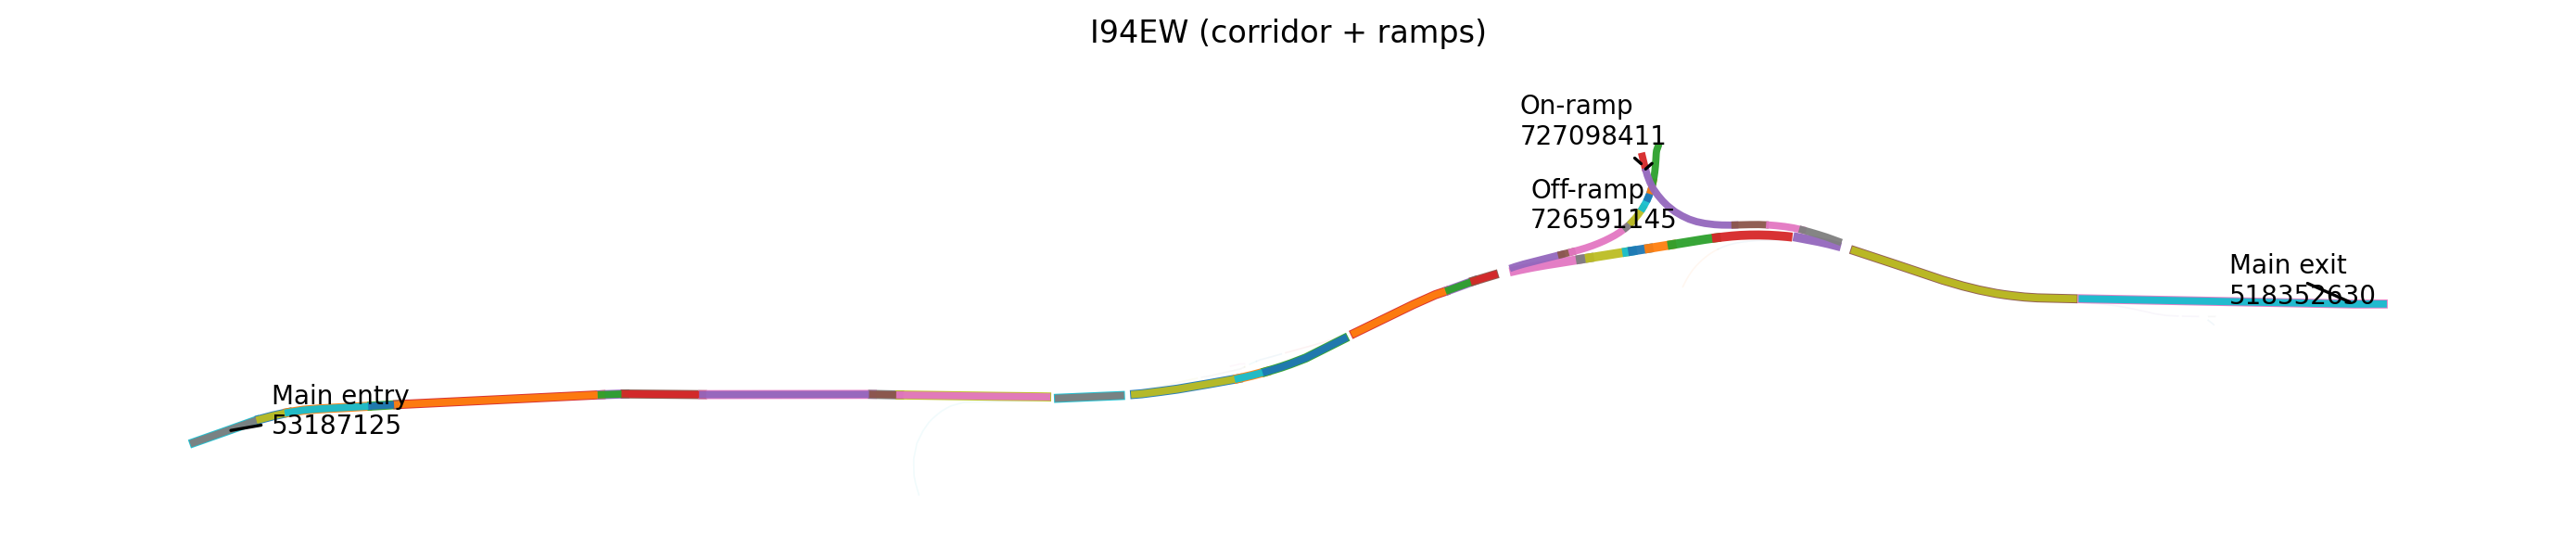

Saved: I94EW_planview_clean.png


In [3]:
import os
import matplotlib.pyplot as plt
from sumolib.net import readNet

NET_FILE = "I94EW.net.xml"

# Paste the SAME route strings you use in your .rou.xml
ROUTE_STAY = "53187125 99457879 99457861 99457865 1447866124 99457871 1040199894 99457868 99457881 99457867 1040187307 1040187306 54582833 54582832 998964264 1040190012 54641968 54618319 726591114 726591113 726591150 726591149 103504797 103504792 103504816 103504815 50487000 518352630"
ROUTE_EXIT = "53187125 99457879 99457861 99457865 1447866124 99457871 1040199894 99457868 99457881 99457867 1040187307 1040187306 54582833 54582832 998964264 1040190012 54641968 726591116 726591115 19069383 726591112 726591111 726591146 726591144 726591143 726591145"
ROUTE_RAMP = "727098411 178570538#0 178570538#1 727098410 103504788 50487000 518352630"

# Key edges for labeling
MAIN_ENTRY = "53187125"
MAIN_EXIT  = "518352630"
ON_RAMP    = "727098411"
OFF_RAMP   = "726591145"

OUT_PNG = "I94EW_planview_clean.png"

def edges(route_str):
    return route_str.strip().split()

def plot_edge(ax, edge, lw=2.5, alpha=1.0, z=3):
    shp = edge.getShape()
    xs = [p[0] for p in shp]
    ys = [p[1] for p in shp]
    ax.plot(xs, ys, linewidth=lw, alpha=alpha, zorder=z)

def route_bbox(net, eids):
    xs, ys = [], []
    for eid in eids:
        e = net.getEdge(eid)
        for x, y in e.getShape():
            xs.append(x); ys.append(y)
    return min(xs), max(xs), min(ys), max(ys)

def edge_midpoint(net, eid):
    e = net.getEdge(eid)
    shp = e.getShape()
    mid = shp[len(shp)//2]
    return mid[0], mid[1]

def annotate_callout(ax, net, eid, text, dx, dy):
    x, y = edge_midpoint(net, eid)
    ax.annotate(
        text,
        xy=(x, y),
        xytext=(x + dx, y + dy),
        textcoords="data",
        fontsize=10,
        ha="left",
        va="center",
        arrowprops=dict(arrowstyle="-", lw=1.2),
        zorder=10
    )

def main():
    net = readNet(NET_FILE)

    stay = edges(ROUTE_STAY)
    ex   = edges(ROUTE_EXIT)
    ramp = edges(ROUTE_RAMP)

    # Union of edges we want bold
    focus = list(dict.fromkeys(stay + ex + ramp))  # unique, keep order

    fig, ax = plt.subplots(figsize=(14, 5), dpi=200)

    # (Optional) draw the rest very faint (comment out if you want ONLY the corridor)
    for e in net.getEdges():
        if e.isSpecial():
            continue
        plot_edge(ax, e, lw=0.6, alpha=0.06, z=1)

    # Draw mainline "stay" boldest
    for eid in stay:
        plot_edge(ax, net.getEdge(eid), lw=3.5, alpha=0.95, z=4)

    # Draw exit branch bold
    for eid in ex:
        plot_edge(ax, net.getEdge(eid), lw=2.8, alpha=0.95, z=5)

    # Draw on-ramp bold
    for eid in ramp:
        plot_edge(ax, net.getEdge(eid), lw=2.8, alpha=0.95, z=6)

    # Auto-zoom to the corridor bbox with padding
    xmin, xmax, ymin, ymax = route_bbox(net, focus)
    pad_x = 0.08 * (xmax - xmin)
    pad_y = 0.25 * (ymax - ymin)  # extra vertical padding so ramps aren’t cramped
    ax.set_xlim(xmin - pad_x, xmax + pad_x)
    ax.set_ylim(ymin - pad_y, ymax + pad_y)

    # Clean callouts (tweak dx/dy if you want different placement)
    if net.hasEdge(MAIN_ENTRY):
        annotate_callout(ax, net, MAIN_ENTRY, f"Main entry\n{MAIN_ENTRY}", dx=80, dy=35)
    if net.hasEdge(MAIN_EXIT):
        annotate_callout(ax, net, MAIN_EXIT, f"Main exit\n{MAIN_EXIT}", dx=-220, dy=40)
    if net.hasEdge(ON_RAMP):
        annotate_callout(ax, net, ON_RAMP, f"On-ramp\n{ON_RAMP}", dx=-220, dy=80)
    if net.hasEdge(OFF_RAMP):
        annotate_callout(ax, net, OFF_RAMP, f"Off-ramp\n{OFF_RAMP}", dx=-220, dy=-80)

    ax.set_aspect("equal", adjustable="box")
    ax.axis("off")
    ax.set_title("I94EW (corridor + ramps)", pad=12)

    plt.tight_layout()
    plt.savefig(OUT_PNG, bbox_inches="tight")
    plt.show()

    print(f"Saved: {OUT_PNG}")

if __name__ == "__main__":
    # If sumolib import fails, uncomment these lines:
    # import sys
    # sys.path.append(os.path.join(os.environ["SUMO_HOME"], "tools"))
    main()


In [4]:
from sumolib.net import readNet

NET_FILE = "I94EW.net.xml"

ROUTE_STAY = "53187125 99457879 99457861 99457865 1447866124 99457871 1040199894 99457868 99457881 99457867 1040187307 1040187306 54582833 54582832 998964264 1040190012 54641968 54618319 726591114 726591113 726591150 726591149 103504797 103504792 103504816 103504815 50487000 518352630"
ROUTE_EXIT = "53187125 99457879 99457861 99457865 1447866124 99457871 1040199894 99457868 99457881 99457867 1040187307 1040187306 54582833 54582832 998964264 1040190012 54641968 726591116 726591115 19069383 726591112 726591111 726591146 726591144 726591143 726591145"
ROUTE_RAMP = "727098411 178570538#0 178570538#1 727098410 103504788 50487000 518352630"

def route_length(net, route_str):
    total = 0.0
    for eid in route_str.split():
        total += net.getEdge(eid).getLength()
    return total

net = readNet(NET_FILE)
print("stay length (m):", route_length(net, ROUTE_STAY))
print("exit length (m):", route_length(net, ROUTE_EXIT))
print("ramp length (m):", route_length(net, ROUTE_RAMP))


stay length (m): 3714.910000000001
exit length (m): 2604.8700000000003
ramp length (m): 1318.74


In [5]:
import os
import json
import csv
from math import ceil

# -----------------------------
# USER SETTINGS
# -----------------------------
NET_FILE = "I94EW.net.xml"

# Given important IDs (for labeling only)
MAIN_ENTRY_EDGE = "53187125"
MAIN_EXIT_EDGE  = "518352630"
ONRAMP_ENTRY_EDGE = "727098411"
OFFRAMP_EXIT_EDGE = "726591145"

# Your routes (from your .rou.xml) — keep as-is
ROUTE_STAY = "53187125 99457879 99457861 99457865 1447866124 99457871 1040199894 99457868 99457881 99457867 1040187307 1040187306 54582833 54582832 998964264 1040190012 54641968 54618319 726591114 726591113 726591150 726591149 103504797 103504792 103504816 103504815 50487000 518352630"
ROUTE_EXIT = "53187125 99457879 99457861 99457865 1447866124 99457871 1040199894 99457868 99457881 99457867 1040187307 1040187306 54582833 54582832 998964264 1040190012 54641968 726591116 726591115 19069383 726591112 726591111 726591146 726591144 726591143 726591145"
ROUTE_RAMP = "727098411 178570538#0 178570538#1 727098410 103504788 50487000 518352630"

# Optional: for Task 3 cell-based model, pick a cell length (m)
# e.g., 50m or use v_free*dt later. This is just for a helpful output.
CELL_LENGTH_M = 50.0


# -----------------------------
# Helpers
# -----------------------------
def import_sumolib():
    """
    Try to import sumolib. Works if SUMO is installed and SUMO_HOME is set,
    or if sumolib is on PYTHONPATH.
    """
    try:
        from sumolib.net import readNet
        return readNet
    except Exception:
        sumo_home = os.environ.get("SUMO_HOME")
        if sumo_home:
            tools = os.path.join(sumo_home, "tools")
            if tools not in os.sys.path:
                os.sys.path.append(tools)
        from sumolib.net import readNet
        return readNet


def edges_from_route(route_str):
    return route_str.split()


def route_length(net, edge_ids):
    total = 0.0
    for eid in edge_ids:
        total += net.getEdge(eid).getLength()
    return total


def cumulative_distance_to_edge_start(net, route_edge_ids, target_edge_id):
    """
    Distance from the start of route to the start of target edge.
    """
    dist = 0.0
    for eid in route_edge_ids:
        if eid == target_edge_id:
            return dist
        dist += net.getEdge(eid).getLength()
    return None


def first_divergence_edge(prefix_route, other_route):
    """
    Returns (shared_prefix_edges, first_edge_in_other_not_in_prefix_after_shared)
    based on shared prefix (not set membership, actual prefix order).
    """
    shared = []
    for a, b in zip(prefix_route, other_route):
        if a == b:
            shared.append(a)
        else:
            break
    first_other = other_route[len(shared)] if len(shared) < len(other_route) else None
    return shared, first_other


def lane_stats_on_route(net, route_edge_ids):
    per_edge = []
    for eid in route_edge_ids:
        e = net.getEdge(eid)
        nlanes = len(e.getLanes())
        speed = float(e.getSpeed())
        length = float(e.getLength())
        per_edge.append({
            "edge_id": eid,
            "num_lanes": nlanes,
            "speed_mps": speed,
            "length_m": length
        })
    lanes = [r["num_lanes"] for r in per_edge] if per_edge else [0]
    return {
        "per_edge": per_edge,
        "min_lanes": min(lanes),
        "max_lanes": max(lanes),
        "avg_lanes": sum(lanes) / len(lanes) if lanes else 0.0
    }


def build_cells_along_route(net, route_edge_ids, cell_length_m):
    """
    Builds a simple "cells" list along the given route by slicing each edge into
    ceil(edge_length / cell_length_m) cells.
    """
    cells = []
    s = 0.0  # cumulative distance along route
    cell_id = 0
    for eid in route_edge_ids:
        e_len = float(net.getEdge(eid).getLength())
        n = max(1, int(ceil(e_len / cell_length_m)))
        seg = e_len / n
        for i in range(n):
            start = s + i * seg
            end = s + (i + 1) * seg
            cells.append({
                "cell_id": cell_id,
                "edge_id": eid,
                "cell_start_m": start,
                "cell_end_m": end,
                "cell_length_m": end - start
            })
            cell_id += 1
        s += e_len
    return cells


# -----------------------------
# Main extraction
# -----------------------------
def main():
    readNet = import_sumolib()
    net = readNet(NET_FILE)

    stay_edges = edges_from_route(ROUTE_STAY)
    exit_edges = edges_from_route(ROUTE_EXIT)
    ramp_edges = edges_from_route(ROUTE_RAMP)

    # Basic lengths
    mainline_length_m = route_length(net, stay_edges)
    exit_route_length_m = route_length(net, exit_edges)
    onramp_route_length_m = route_length(net, ramp_edges)

    # Off-ramp starts at divergence from mainline (shared prefix with stay)
    shared_prefix, diverge_edge = first_divergence_edge(stay_edges, exit_edges)

    diverge_distance_m = None
    offramp_length_m = None
    offramp_edges = []
    if diverge_edge is not None:
        diverge_distance_m = cumulative_distance_to_edge_start(net, stay_edges, diverge_edge)
        # offramp edges = exit route from diverge_edge onward
        idx = exit_edges.index(diverge_edge)
        offramp_edges = exit_edges[idx:]
        offramp_length_m = route_length(net, offramp_edges)

    # On-ramp merge: find first edge in ramp route that is on the mainline route
    merge_edge = None
    for eid in ramp_edges:
        if eid in stay_edges:
            merge_edge = eid
            break

    merge_distance_m = None
    if merge_edge is not None:
        merge_distance_m = cumulative_distance_to_edge_start(net, stay_edges, merge_edge)

    # Mainline lane stats
    lane_info = lane_stats_on_route(net, stay_edges)

    # Export per-edge info
    out_edge_csv = "task3_mainline_edge_info.csv"
    with open(out_edge_csv, "w", newline="", encoding="utf-8") as f:
        w = csv.DictWriter(f, fieldnames=["edge_id", "num_lanes", "speed_mps", "length_m"])
        w.writeheader()
        w.writerows(lane_info["per_edge"])

    # Build optional "cells" file (helpful for Task 3 CA/CTM representation)
    cells = build_cells_along_route(net, stay_edges, CELL_LENGTH_M)
    out_cells_csv = "task3_mainline_cells.csv"
    with open(out_cells_csv, "w", newline="", encoding="utf-8") as f:
        w = csv.DictWriter(f, fieldnames=["cell_id", "edge_id", "cell_start_m", "cell_end_m", "cell_length_m"])
        w.writeheader()
        w.writerows(cells)

    summary = {
        "net_file": NET_FILE,
        "important_edges": {
            "main_entry_edge": MAIN_ENTRY_EDGE,
            "main_exit_edge": MAIN_EXIT_EDGE,
            "onramp_entry_edge": ONRAMP_ENTRY_EDGE,
            "offramp_exit_edge": OFFRAMP_EXIT_EDGE
        },
        "route_lengths_m": {
            "mainline_stay_route_m": mainline_length_m,
            "exit_route_to_offramp_m": exit_route_length_m,
            "onramp_route_m": onramp_route_length_m,
            "offramp_only_m": offramp_length_m
        },
        "merge_and_diverge_locations_along_mainline_m": {
            "onramp_merge_edge": merge_edge,
            "onramp_merge_distance_from_entry_m": merge_distance_m,
            "offramp_diverge_edge": diverge_edge,
            "offramp_diverge_distance_from_entry_m": diverge_distance_m
        },
        "mainline_lanes": {
            "min_lanes": lane_info["min_lanes"],
            "max_lanes": lane_info["max_lanes"],
            "avg_lanes": lane_info["avg_lanes"]
        },
        "exports": {
            "mainline_edge_info_csv": out_edge_csv,
            "mainline_cells_csv": out_cells_csv
        }
    }

    out_json = "task3_network_summary.json"
    with open(out_json, "w", encoding="utf-8") as f:
        json.dump(summary, f, indent=2)

    # Print a clean human-readable summary
    print("\n================= TASK 3 NETWORK INFO (from SUMO net.xml) =================")
    print(f"Network: {NET_FILE}")
    print("\n--- Lengths ---")
    print(f"Mainline (stay) length:   {mainline_length_m:.1f} m")
    print(f"Exit route length:        {exit_route_length_m:.1f} m")
    print(f"On-ramp route length:     {onramp_route_length_m:.1f} m")
    if offramp_length_m is not None:
        print(f"Off-ramp only length:     {offramp_length_m:.1f} m  (from diverge to {OFFRAMP_EXIT_EDGE})")
    else:
        print("Off-ramp only length:     NOT FOUND (could not detect divergence)")

    print("\n--- Where ramp starts (merge/diverge along mainline) ---")
    if merge_edge and merge_distance_m is not None:
        print(f"On-ramp merges at edge:   {merge_edge}")
        print(f"On-ramp merge location:   {merge_distance_m:.1f} m from main entry ({MAIN_ENTRY_EDGE})")
    else:
        print("On-ramp merge location:   NOT FOUND (could not detect first mainline edge in ramp route)")

    if diverge_edge and diverge_distance_m is not None:
        print(f"Off-ramp diverges at edge:{diverge_edge}")
        print(f"Off-ramp diverge location:{diverge_distance_m:.1f} m from main entry ({MAIN_ENTRY_EDGE})")
    else:
        print("Off-ramp diverge location:NOT FOUND (could not detect divergence between stay/exit routes)")

    print("\n--- Mainline lanes (along stay route) ---")
    print(f"Min lanes: {lane_info['min_lanes']}   Max lanes: {lane_info['max_lanes']}   Avg lanes: {lane_info['avg_lanes']:.2f}")

    print("\n--- Files written ---")
    print(f"- {out_edge_csv}  (per-edge length, lanes, speed on mainline)")
    print(f"- {out_cells_csv} (cell list along mainline using CELL_LENGTH_M={CELL_LENGTH_M} m)")
    print(f"- {out_json}      (all summary numbers in one place)")
    print("============================================================================\n")


if __name__ == "__main__":
    main()



================= TASK 3 NETWORK INFO (from SUMO net.xml) =================
Network: I94EW.net.xml

--- Lengths ---
Mainline (stay) length:   3714.9 m
Exit route length:        2604.9 m
On-ramp route length:     1318.7 m
Off-ramp only length:     367.2 m  (from diverge to 726591145)

--- Where ramp starts (merge/diverge along mainline) ---
On-ramp merges at edge:   50487000
On-ramp merge location:   2791.1 m from main entry (53187125)
Off-ramp diverge location:NOT FOUND (could not detect divergence between stay/exit routes)

--- Mainline lanes (along stay route) ---
Min lanes: 3   Max lanes: 4   Avg lanes: 3.25

--- Files written ---
- task3_mainline_edge_info.csv  (per-edge length, lanes, speed on mainline)
- task3_mainline_cells.csv (cell list along mainline using CELL_LENGTH_M=50.0 m)
- task3_network_summary.json      (all summary numbers in one place)

